# Pet Classification Model Using CNN | Chaitanya GNB

### Project objective:

Build a CNN model that classifies the given pet images correctly into dog and cat images. 

### Project Description and Scope: 

You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data. 

### Project Guidelines:

Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers: 

● Input layer 

● Convolutional layer 1 with 32 filters of kernel size[5,5] 

● Pooling layer 1 with pool size[2,2] and stride 2 

● Convolutional layer 2 with 64 filters of kernel size[5,5] 

● Pooling layer 2 with pool size[2,2] and stride 2 

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 

● Dropout layer with dropout probability 0.4 

Predict the class by doing a softmax on the output of the dropout layers. 

This should be followed by training and evaluation: 

● For the training step, define the loss function and minimize it 

● For the evaluation step, calculate the accuracy 

Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 

### Problem statement :

In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying dog and cat images. The Total number of images available for training are 40 and final testing is done on another set of 10 images.

In [1]:
# Import keras to build CNN model
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Input layer - Initialising the CNN
fc_size=32
classifier = Sequential()

In [4]:
# Convolutional layer 1 with 32 filters of kernel size[5,5] 
classifier.add(Conv2D(32, (5, 5), input_shape = (128, 128, 3), activation = 'relu'))

In [5]:
# Pooling layer 1 with pool size[2,2] and stride 2 
classifier.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [6]:
# Convolutional layer 2 with 64 filters of kernel size[5,5] 
classifier.add(Conv2D(64, (5, 5), activation = 'relu'))

In [7]:
# Pooling layer 2 with pool size[2,2] and stride 2 
classifier.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [8]:
# Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
classifier.add(Dense(fc_size,activation='relu'))

In [9]:
# Flattening
classifier.add(Flatten())

In [10]:
# Dropout layer with dropout probability 0.4 
classifier.add(Dropout(0.4))

In [11]:
# Predict the class by doing a softmax on the output of the dropout layers. 
classifier.add(Dense(units=1,activation='sigmoid'))
#adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
#Training Set
train_set = train_datagen.flow_from_directory('train',
                                             target_size=(128, 128),
                                             batch_size=64,
                                             class_mode='binary')

Found 40 images belonging to 2 classes.


In [14]:
#Test Set
test_set = test_datagen.flow_from_directory('test',
                                           target_size=(128, 128),
                                           batch_size = 64,
                                           class_mode='binary')

Found 20 images belonging to 2 classes.


In [15]:
# Fitting data into model
classifier.fit_generator(train_set,
                        epochs = 50,
                        validation_data = test_set
                        )

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.7231 - accuracy: 0.5000 - val_loss: 0.7665 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.7654 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.6814 - accuracy: 0.6000 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.6933 - accuracy: 0.5250 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.6913 - accuracy: 0.5250 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.6840 - val_accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.6862 - accuracy: 0.6000 - val_loss: 0.6827 - val_accuracy: 0.6000
Epoch 8/50
1/1 [=========================

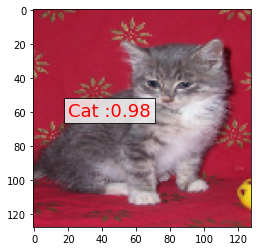

In [16]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('test/cats/110.jpg', target_size=(128, 128))
img = image.img_to_array(img1)
img = img/255

img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1)
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [17]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cats\101.jpg,0.19957,0,0
1,cats\102.jpg,0.16679,0,0
2,cats\103.jpg,0.15490,0,0
3,cats\104.jpg,0.86363,0,1
4,cats\105.jpg,0.26794,0,0
5,cats\106.jpg,0.07146,0,0
6,cats\107.jpg,0.37404,0,0
7,cats\108.jpg,0.01786,0,0
8,cats\109.jpg,0.37694,0,0
9,cats\110.jpg,0.08216,0,0


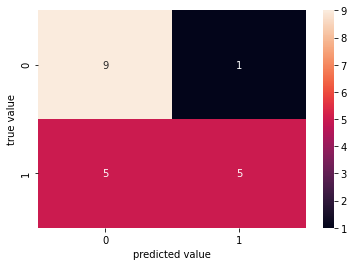

In [19]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 29, 29, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0         
_________________________________________________________________
dropout (Dropout)            (None, 26912)             0

### Visualization of Layers Ouptut


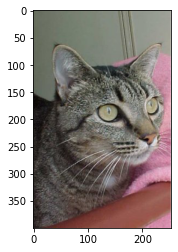

In [21]:
#Input Image for Layer visualization
img1 = image.load_img('test/cats/104.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('test/cats/104.jpg', target_size=(128, 128))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [22]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'dense', 'flatten', 'dropout', 'dense_1']


In [23]:
from tensorflow.keras.models import Model
conv2d_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d').output)
conv2d_1_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_1').output)

In [24]:
conv2d_features = conv2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
print('First conv layer feature output shape : ',conv2d_features.shape)
print('Second conv layer feature output shape : ',conv2d_1_features.shape)

First conv layer feature output shape :  (1, 124, 124, 32)
Second conv layer feature output shape :  (1, 58, 58, 64)


### Single Convolution Filter Output

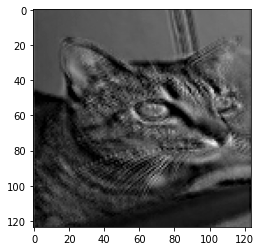

In [25]:
plt.imshow(conv2d_features[0, :, :, 4], cmap='gray')

### First Covolution Layer Output

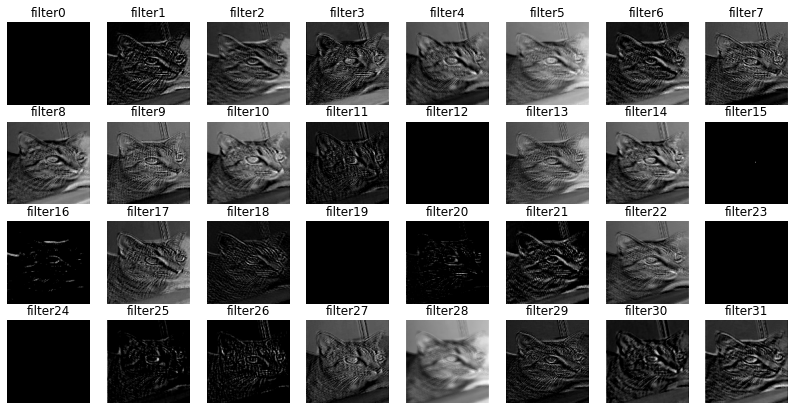

In [26]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='gray')
plt.show()

### Second Covolution Layer Output

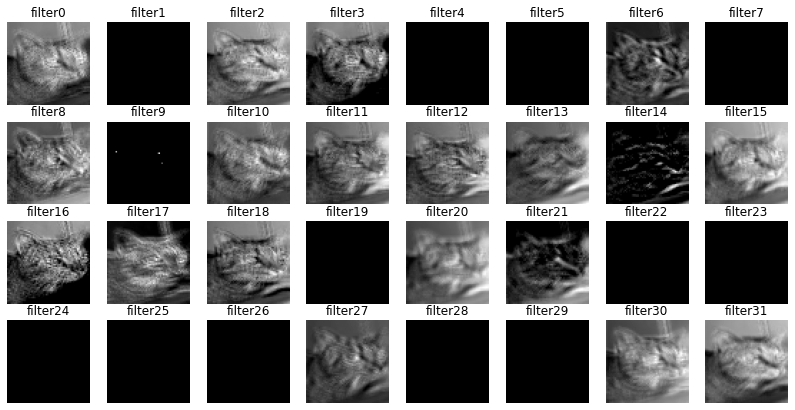

In [27]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')
plt.show()

### Model Performance on Unseen Data

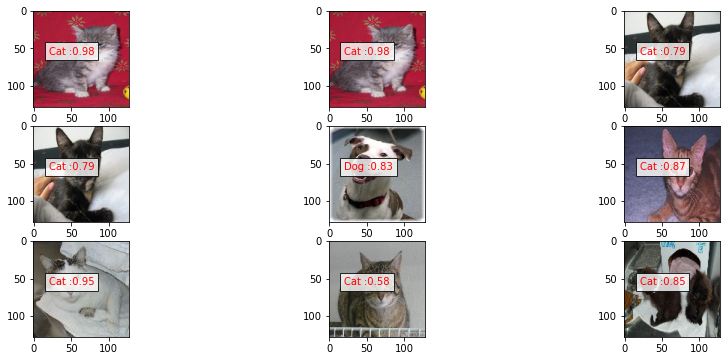

In [28]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('test/'+test_set.filenames[np.random.choice(range(1,11))], target_size=(128, 128))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)


In [29]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

In [30]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 85.00%     Training loss  : 0.340445
Validation Accuracy: 60.00%     Validation loss: 0.756337
